# Plotting google trends in python

[Google Trends](https://trends.google.com/trends/) show you the search-term frequency of a specific term relative to the total search-volume. 

As by now, their is [no official API interface to Google trends](https://en.wikipedia.org/wiki/Google_Trends#Google_Trends_API). Their are, however, some unofficial packages to access the Google Trends. One of them is [pytrends](https://github.com/GeneralMills/pytrends) which we will use here to get the relaitve search-term frequency.

Pytrends is available from pypi. To install use pip from the commandline: ```pip install pytrends```. For the analysis we will use [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) which also need to be installed on your system.

First, we import the required packages:

In [1]:
from pytrends.request import TrendReq
import pytrends
import matplotlib.pyplot as plt
import pandas as pd

Google Trends currently allows to ask for up to five keywords. 
Here, we want to compare the relative search term frequency of "global warming" and "climate change" for the last 5 years ([for further option see the pytrends readme](https://github.com/GeneralMills/pytrends)):

In [2]:
search_terms = ["climate change", "global warming"]
timeframe = "2012-01-01 2017-10-30"

To issue an request, we first have to init a TrendReq object:

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)

We can than build the payload for the request and ask for the interest of these search-terms over time:

In [4]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(search_terms, 
                       timeframe=timeframe)
trends = pytrends.interest_over_time()

pytrends returns a pandas dataframe, which we can inspect:

In [5]:
trends.tail()

climate change  global warming  isPartial
date                                                 
2017-06-01              84              54      False
2017-07-01              46              40      False
2017-08-01              49              40      False
2017-09-01              73              56      False
2017-10-01              64              52      False

As you see, is contains a column "isPartial" which is set to true if the data for a given month is not complete.
After checking for completness we can delete this column:

In [6]:
if all(trends.isPartial == False):
    del trends['isPartial']

We can now start plotting the data using standard matplotlib functionality:

In [7]:
def plot_searchterms(df):
    """Plots google trends
    
    Parameters
    ----------
    df: pandas dataframe
        As returned from pytrends, without the "isPartial" column
    
    Returns
    -------
    ax: axis handle
    """
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)
    df.plot(ax=ax)
    plt.ylabel('Relative search term frequency')
    plt.xlabel('Date')
    plt.ylim((0,120))
    plt.legend(loc='lower left')
    return ax

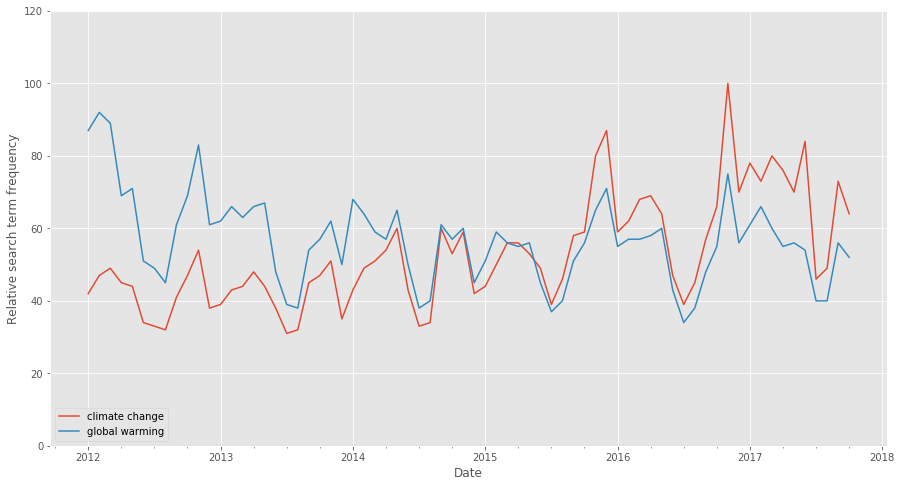

In [8]:
plt.style.use('ggplot')
ax = plot_searchterms(trends)
plt.show()

We can now annotate the times of the [UNFCCC Conference of Parties (COP)](https://en.wikipedia.org/wiki/United_Nations_Climate_Change_conference):

In [9]:
def annotate_range(ax, start, end, text, y=104, texty_offset=3):
    """ Annotate the month of the given date

    Note
    ----
    
    If the given date is within one month, the starting date gets extended to the previous
    month. This is necessary since the google trend data has a monthly granularity, any
    annotation shorter than a month would not appear.
    
    Parameters
    ----------
    
    ax: axis 
        Handle to an exisiting axis
    start: str
        Date as string, must be parseable by pandas.to_datetime
    end: str
        Date as string, must be parseable by pandas.to_datetime
    text: str
        The text for the annotation
    y: float
        Where on the y axis the annotation should be placed
    texty_offset: float
        Relative offset of the text to the annotation marker
        
    """
    start_date_orig = pd.to_datetime(start)
    end_date = pd.to_datetime(end)

    if start_date_orig.month == end_date.month:
        start_date = start_date_orig - pd.Timedelta(days=start_date_orig.day + 2)
    else:
        start_date = start_date_orig

    ax.annotate("", 
        xy=(pd.to_datetime(start_date), y), xycoords='data',
        xytext=(pd.to_datetime(end_date), y), textcoords='data',
        color='black',
        arrowprops=dict(
             edgecolor='black',
             shrinkA=0,
             shrinkB=0,
             linewidth=2,
             arrowstyle='|-|, widthA=0.5, widthB=0.5',
                )
            )

    ax.text( 
        x=start_date,
        y=y+texty_offset, 
        s=text,
        horizontalalignment='left',
        verticalalignment='bottom',
        rotation=45)

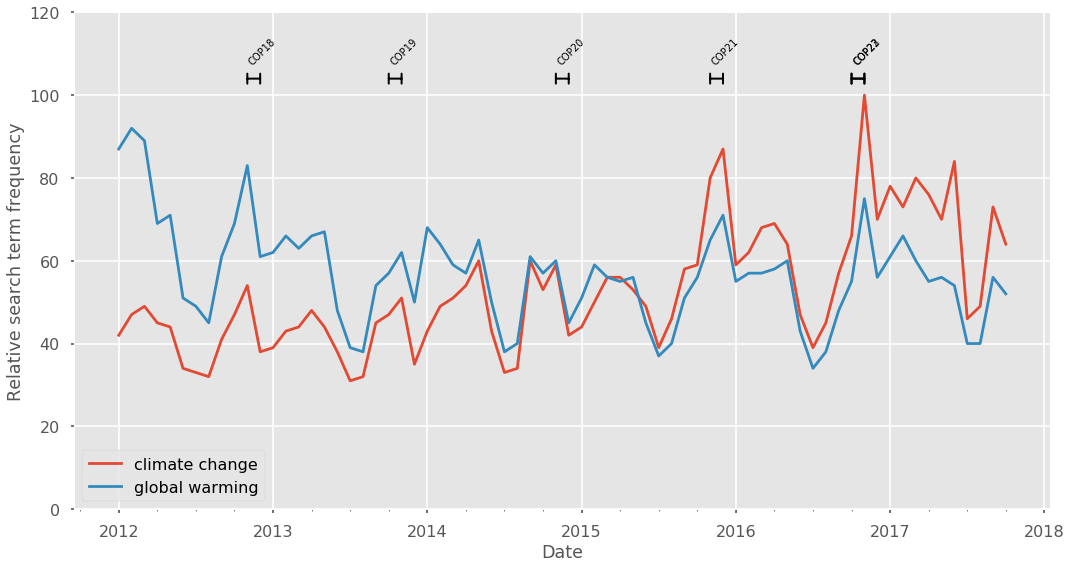

In [10]:
plt.style.use('seaborn-poster')
ax = plot_searchterms(trends)

annotate_range(ax, '2016-11-06','2016-11-17','COP23')
annotate_range(ax, '2016-11-07','2016-11-18','COP22')
annotate_range(ax, '2015-11-30','2015-12-12','COP21')
annotate_range(ax, '2014-12-01','2014-12-12','COP20')
annotate_range(ax, '2013-11-11','2013-11-23','COP19')
annotate_range(ax, '2012-11-26','2012-12-07','COP18')

plt.tight_layout()
plt.show()

<a href=https://creativecommons.org/licenses/by/4.0/>
<img src="https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg" alt="CC-BY4.0 licence" align=right>
</img>
</a>